# Table of Content
- [Table of Content](#table-of-content)
- [0-General](#0-general)
  - [Objectives](#objectives)
  - [Analysis steps](#analysis-steps)
  - [Data Dictionary](#data-dictionary)
  - [Acknowledgements](#acknowledgements)
  - [Libraries](#libraries)
- [1-Data Exploration](#1-data-exploration)
- [2-Data Preprocessing](#2-data-preprocessing)
- [3-Exploratory Data Analysis](#3-exploratory-data-analysis)
- [4-Feature Selection and Engineering](#4-feature-selection-and-engineering)
- [5-Models](#5-models)
- [6-Preparation Publication Output](#6-preparation-publication-output)
  - [6.1-Descriptive table](#61-descriptive-table)
  - [6.2-Predicting Infant Temperament from Maternal Postnatal Health](#62-predicting-infant-temperament-from-maternal-postnatal-health)
  - [6.3-Time-Dependent Influences and Complex Interactions](#63-time-dependent-influences-and-complex-interactions)
- [7-General Conclusion](#7-general-conclusion)

# 0-General
[Back to Table of Content](#table-of-content)
# Analyzing the Impact of Maternal Mental Health on Child Temperament

## Introduction
[Back to Table of Content](#table-of-content)

This study investigates the cascading effects of maternal postnatal mental health on infant temperament, aiming to understand how maternal well-being may shape early developmental outcomes. The postnatal period represents a critical time for both mother and child, where maternal mental health challenges, such as anxiety or depression, may have a progressive impact on infant temperament. By examining these relationships through path analysis and structural equation modeling (SEM), this research seeks to clarify the direct and indirect pathways through which maternal mental health influences early temperament traits, offering insights that could inform early intervention and support strategies.

## Objectives
[Back to Table of Content](#table-of-content)

- Primary Objective: To explore the cascading effects of maternal postnatal mental health on infant temperament using path analysis and SEM.
- Secondary Objective: To identify and quantify the pathways through which specific maternal mental health factors relate to infant temperament traits.
- Exploratory Objective: To evaluate the model fit and effectiveness of SEM in explaining the nuances of these cascading effects.

## Analysis steps
[Back to Table of Content](#table-of-content)

1. **Data Exploration:** Conduct an initial examination of data characteristics, summary statistics, and identification of any missing values.
2. **Data Preprocessing:** Clean and preprocess the data by handling missing values and transforming relevant features.
3. **Exploratory Data Analysis (EDA):** Visualize initial relationships between maternal mental health factors and infant temperament traits.
4. **Feature Selection and Engineering:** Identify key features relevant to the analysis and engineer additional features if necessary.
5. **Models:** Use path analysis and structural equation modeling (SEM) to examine both direct and indirect effects from maternal mental health to infant temperament traits.
6. **Preparation Publication Output:** Compile model fit indices, path coefficients, and relevant tables and figures for interpretation and publication.

## Data Dictionary
[Back to Table of Content](#table-of-content)

| Column       | Data Type | Description                                                                                     |
|--------------|-----------|-------------------------------------------------------------------------------------------------|
| `Cohort`     | int64     | Identifier for the cohort group of the study participants.                                      |
| `MaternalAge`| float64   | Age of the mother at the time of the study in years.                                            |
| `ChildSex`   | int64     | Sex of the child (1 for male, 0 for female).                                                    |
| `BirthWeight`| int64     | Weight of the child at birth, measured in grams.                                                |
| `BirthHeight`| float64   | Height of the child at birth, measured in centimeters.                                          |
| `HeadCircum` | float64   | Head circumference of the child at birth, measured in centimeters.                              |
| `GAD7_3W`    | float64   | Maternal anxiety score (GAD-7) at 3 weeks postpartum.                                           |
| `GAD7_7M`    | float64   | Maternal anxiety score (GAD-7) at 7 months postpartum.                                          |
| `DTN_7M`     | float64   | Maternal distress tolerance score (DTN) at 7 months postpartum.                                 |
| `GAD7_12M`   | float64   | Maternal anxiety score (GAD-7) at 12 months postpartum.                                         |
| `ADS_12M`    | float64   | Maternal depressive symptoms score (ADS) at 12 months postpartum.                               |
| `DTN_12M`    | float64   | Maternal distress tolerance score (DTN) at 12 months postpartum.                                |
| `EPDS_3W`    | float64   | Maternal depression score (EPDS) at 3 weeks postpartum.                                         |
| `EPDS_7W`    | int64     | Maternal depression score (EPDS) at 7 weeks postpartum.                                         |

## Acknowledgements
[Back to Table of Content](#table-of-content)

We extended our gratitude to the entire research group "Pränatale EInflussfaktoren" of [Dr. med. S. Mudra](https://www.uke.de/kliniken-institute/kliniken/kinder-und-jugendpsychiatrie-psychotherapie-und-psychosomatik/forschung/arbeitsgruppen/index.html), namely Dr. Lydia Li and Dr. Ariane Göbel, as well as PD. Dr. med. A. Perez. We would like to thank all participants for their invalubale contributions to this study as well as thanks to the funding agencies. Statistical analysis was conducted by Dr. Steven Schepanski, who also oversaw this notebook.

# Libraries
[Back to Table of Content](#table-of-content)

In [1]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 
import openpyxl as px
import os
import joblib
import graphviz

import warnings
warnings.filterwarnings('ignore')

#### Load the dataset

In [2]:
path = "/Users/stevenschepanski/Documents/04_ANALYSIS/UKE_Hamburg/Infant_temperament_PAULINE/"

In [3]:
# Read data from the CSV files into data frames
pauline = pd.read_excel(path + "data/C19_PAULINE_3W_7M_12M_Mütter_04082022 an Steven_19102022.xlsx", sheet_name="machine_learning")

# 1-Data Exploration
[Back to Table of Content](#table-of-content)

In [4]:
# Display the first few rows of the DataFrame using the 'head()' method
pauline.head()

,Cohort,MaternalAge,ChildSex,BirthWeight,BirthHeight,HeadCircum,GAD7_3W,GAD7_7M,DTN_7M,GAD7_12M,ADS_12M,DTN_12M,EPDS_3W,EPDS_7W
0,1,17.412731,1,3610,54.0,34.0,4.0,-99.0,-99.0,-99.0,-99.0,-99.0,15.0,-99
1,1,-99.000000,0,2800,48.0,35.0,11.0,-99.0,-99.0,-99.0,-99.0,-99.0,14.0,-99
2,1,27.206023,0,2000,44.0,31.0,5.0,-99.0,-99.0,-99.0,-99.0,-99.0,16.0,-99
3,1,40.783025,1,3220,50.0,35.5,0.0,-99.0,-99.0,-99.0,-99.0,-99.0,20.0,-99
4,1,38.557153,0,2460,48.0,33.0,4.0,5.0,33.0,-99.0,-99.0,-99.0,19.0,5


In [5]:
# Check the shape of the DataFrame (rows, columns)
print('The data frame has',pauline.shape[0],'rows and',pauline.shape[1],'columns.')

The data frame has 204 rows and 14 columns.


In [6]:
# Display a concise summary of the DataFrame'
# The 'info' method provides a concise summary of the DataFrame, including data types, non-null counts, and memory usage
# The 'verbose=True' argument shows the full summary, including the counts of unique values in each column
pauline.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cohort       204 non-null    int64  
 1   MaternalAge  204 non-null    float64
 2   ChildSex     204 non-null    int64  
 3   BirthWeight  204 non-null    int64  
 4   BirthHeight  204 non-null    float64
 5   HeadCircum   204 non-null    float64
 6   GAD7_3W      204 non-null    float64
 7   GAD7_7M      204 non-null    float64
 8   DTN_7M       204 non-null    float64
 9   GAD7_12M     204 non-null    float64
 10  ADS_12M      204 non-null    float64
 11  DTN_12M      204 non-null    float64
 12  EPDS_3W      204 non-null    float64
 13  EPDS_7W      204 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 22.4 KB


In [7]:
# Replace all -99 and -88 values with NaN
pauline = pauline.replace([-99, -88], np.nan)

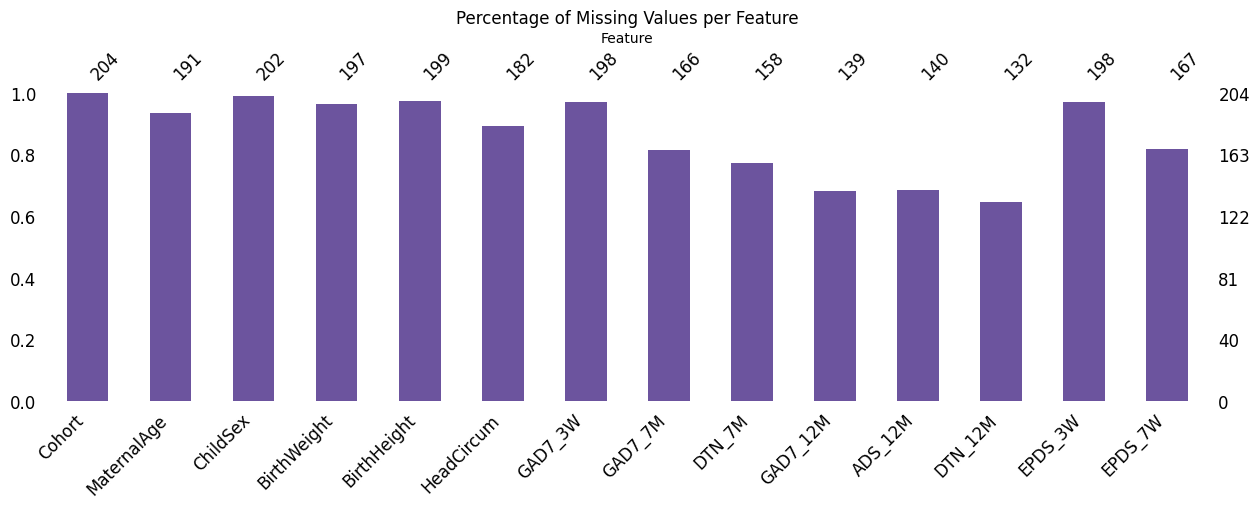

In [8]:
# custom colour
custom_colour = (108/255, 84/255, 158/255) # RGB(108, 84, 158)

# Visualize missing values using missingno
msno.bar(pauline, figsize=(15, 4), color=custom_colour, fontsize=12, labels=True)

# Set plot labels and title
plt.title("Percentage of Missing Values per Feature")
plt.ylabel("Ratio of Missing Values per Feature")
plt.xlabel("Feature")

# Show the plot
plt.show()

The x-axis lists the features or variables in the dataset, and the y-axis represents the proportion of missing values. Each bar's height reflects the percentage of missing values for a given feature, ranging from 0 (no missing values) to 1 (completely missing data).

From the plot, we can see that:

1. Cohort, BirthWeight, ChildSex, MaternalAge, and BirthHeight have relatively complete data, with very few or no missing values.
2. Features related to maternal mental health, such as GAD7_3W and EPDS_3W, show a higher percentage of missing data. GAD7_3W, for example, appears to have around 10% of its values missing.
3. The features ADS_12M and EPDS_7W exhibit a more noticeable portion of missing values, with the latter having nearly 20% of its data missing.
4. EPDS_3W has one of the highest amounts of missing data, with almost 30% of values missing, signaling a potential issue with this variable that might require special attention during analysis.

In [9]:
# Check for duplicate rows in the DataFrame
pauline.duplicated().sum()

0

In [10]:
# Display descriptive statistics for numerical columns in the DataFrame 'df_resized'

# The 'describe' method provides summary statistics (mean, std, min, 25%, 50%, 75%, max) for numerical columns
# The 'T' at the end transposes the result for better readability
pauline.describe().T

,count,mean,std,min,25%,50%,75%,max
Cohort,204.0,1.450980,0.498815,1.000000,1.000000,1.000000,2.000000,2.000000
MaternalAge,191.0,34.317670,4.340959,17.412731,31.794661,34.028747,37.329227,48.668036
ChildSex,202.0,0.549505,0.498779,0.000000,0.000000,1.000000,1.000000,1.000000
BirthWeight,197.0,3500.421320,474.897057,1850.000000,3240.000000,3520.000000,3840.000000,4640.000000
BirthHeight,199.0,52.091457,2.543714,44.000000,50.500000,52.000000,54.000000,59.000000
HeadCircum,182.0,35.161538,1.664134,23.500000,34.000000,35.000000,36.000000,43.000000
GAD7_3W,198.0,4.847948,3.900380,0.000000,2.000000,4.000000,6.000000,21.000000
GAD7_7M,166.0,4.203295,3.607403,0.000000,2.000000,3.000000,6.000000,20.000000
DTN_7M,158.0,24.387273,6.832354,12.000000,19.421035,23.000000,28.843161,44.000000
GAD7_12M,139.0,4.844095,3.704104,0.000000,3.000000,4.000000,6.000000,21.000000


**General information:**
1. Cohort: The data is split almost equally between two cohorts (mean: 1.45, with a range between 1 and 2). This indicates that the participants are evenly distributed across the two study groups.
2. MaternalAge: The average maternal age is approximately 34.3 years, with a standard deviation of 4.34 years, reflecting some variability in the ages of the mothers. The minimum age is quite young at 17.4 years, while the maximum age reaches 48.7 years. Most mothers fall between 31.8 and 37.3 years, based on the interquartile range (IQR).
3. ChildSex: This variable is binary (0 for female and 1 for male), with an average of 0.55, indicating a nearly equal distribution between male and female children (with a slight bias towards male participants).
4. BirthWeight: The mean birth weight is 3500 grams, with a standard deviation of 474.9 grams, showing moderate variability. The minimum recorded birth weight is 1850 grams, while the maximum is 4640 grams, indicating that the dataset includes a range of birth weights from low to high.
5. BirthHeight: On average, children are born with a length of approximately 52.1 cm, with a relatively narrow spread of data (standard deviation of 2.54 cm). The smallest baby in the dataset was 44 cm long, while the tallest was 59 cm.
6. HeadCircum: The average head circumference is 35.2 cm, with some variability (standard deviation of 1.66 cm). The minimum head circumference is unusually small at 23.5 cm, while the maximum reaches 43 cm.

**Mental Health Measures (GAD7, EPDS, ADS):**

1. GAD7_3W, GAD7_7M, GAD7_12M: These are scores from the GAD-7 anxiety screening tool at 3 weeks, 7 months, and 12 months postpartum, respectively. The scores at 3 weeks (mean: 4.85) show a wide spread (standard deviation: 3.90), with values ranging from 0 to 21, indicating a diverse range of anxiety symptoms. Similar variability is observed at 7 months and 12 months, with slightly lower mean scores of 4.2 and 4.8, respectively.
2. EPDS_3W, EPDS_7W: The Edinburgh Postnatal Depression Scale (EPDS) shows higher scores at 3 weeks (mean: 18.2, with a standard deviation of 2.65), indicating a generally higher reported level of postpartum depression symptoms. The scores drop at 7 weeks (mean: 5.43), reflecting a decrease in symptoms as time progresses.
3. ADS_12M: This measure of depression at 12 months postpartum shows an average score of 8.88, with a significant range (standard deviation: 7.41). The values range from 0 to 41, indicating that some participants experience much higher levels of depressive symptoms than others.

**Infant Temperament (Distress-to-novelty, DTN):**

1. DTN_7M and DTN_12M: These represent the "Distress-to-novelty" scale from a questionnaire assessing infant temperament at 7 and 12 months. The average score at 7 months is 24.4, with a standard deviation of 6.83, indicating moderate variability in responses. At 12 months, the mean score increases to 32.2, with a standard deviation of 8.94. The data show that distress-to-novelty scores generally increase over time, as expected, but the wide range (from 12 to 65) suggests considerable differences in temperament among the infants.

# 2-Data Preprocessing
[Back to Table of Content](#table-of-content)

We will address the missing values by multiple imputations.

In [11]:
import miceforest as mf

# prepare data set and change Cohort and ChildSex to categorical
pauline['Cohort'] = pauline['Cohort'].astype('category')
pauline['ChildSex'] = pauline['ChildSex'].astype('category')

In [ ]:
# Initialize the MICE imputation kernel with 30 datasets
kds = mf.ImputationKernel(
    data=pauline,
    datasets=30,
    save_all_iterations=True,
    random_state=42
)

# Run the MICE algorithm for 20 iterations
kds.mice(20)

In [12]:
# Create the full output path for saving imputed datasets
output_folder = os.path.join(path, "data/imputed_datasets")

In [16]:
# Create the folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Save the entire ImputationKernel object to a file using joblib
joblib.dump(kds, os.path.join(output_folder, "imputed_kernel.joblib"))

print(f"ImputationKernel object saved in folder: {output_folder}")

ImputationKernel object saved in folder: /Users/stevenschepanski/Documents/04_ANALYSIS/UKE_Hamburg/Infant_temperament_PAULINE/data/imputed_datasets


# 3-Exploratory Data Analysis
[Back to Table of Content](#table-of-content)

In [13]:
# Load the ImputationKernel object from the file
kds_loaded = joblib.load(os.path.join(output_folder, "imputed_kernel.joblib"))

# Now you can use `kds_loaded` as the loaded ImputationKernel object
print("ImputationKernel object successfully loaded!")

ImputationKernel object successfully loaded!


In the Exploratory Data Analysis (EDA), my focus will be on examining the data distribution, investigating the correlation among features, and exploring the connection between the features and the target variable. I will commence by scrutinizing the data distribution, and subsequently, I will delve into the relationship between the target and the independent variables.

In [14]:
# Get the number of imputed datasets
n_datasets = 30  # You used 30 imputed datasets

# Create an empty DataFrame to store the averaged dataset
complete_data_avg = pd.DataFrame()

In [15]:
# Plot histograms for continuous variables
continuous_vars = ['MaternalAge', 'BirthWeight', 'BirthHeight', 'HeadCircum', 
                   'GAD7_3W', 'GAD7_7M', 'DTN_7M', 'GAD7_12M', 'ADS_12M', 
                   'DTN_12M', 'EPDS_3W', 'EPDS_7W']

# Categorical variables
categorical_vars = ['Cohort', 'ChildSex']

In [16]:
# Average the continuous variables
for i in range(n_datasets):
    if complete_data_avg.empty:
        complete_data_avg = kds_loaded.complete_data(i)[continuous_vars]
    else:
        complete_data_avg += kds_loaded.complete_data(i)[continuous_vars]

# Divide by the number of datasets to get the average for continuous variables
complete_data_avg /= n_datasets

In [17]:
# Handle categorical variables: use mode (most frequent value) across all imputed datasets independently
complete_data_categorical = pd.DataFrame()

# Calculate modes separately for 'Cohort' and 'ChildSex'
for var in categorical_vars:
    # Find the mode for each categorical variable across the imputed datasets
    modes = pd.concat([kds_loaded.complete_data(i)[var] for i in range(n_datasets)], axis=1).mode(axis=1)[0]
    complete_data_categorical[var] = modes.astype('category')

# Combine the continuous and categorical data into one DataFrame
complete_data_final = pd.concat([complete_data_avg.reset_index(drop=True), complete_data_categorical.reset_index(drop=True)], axis=1)

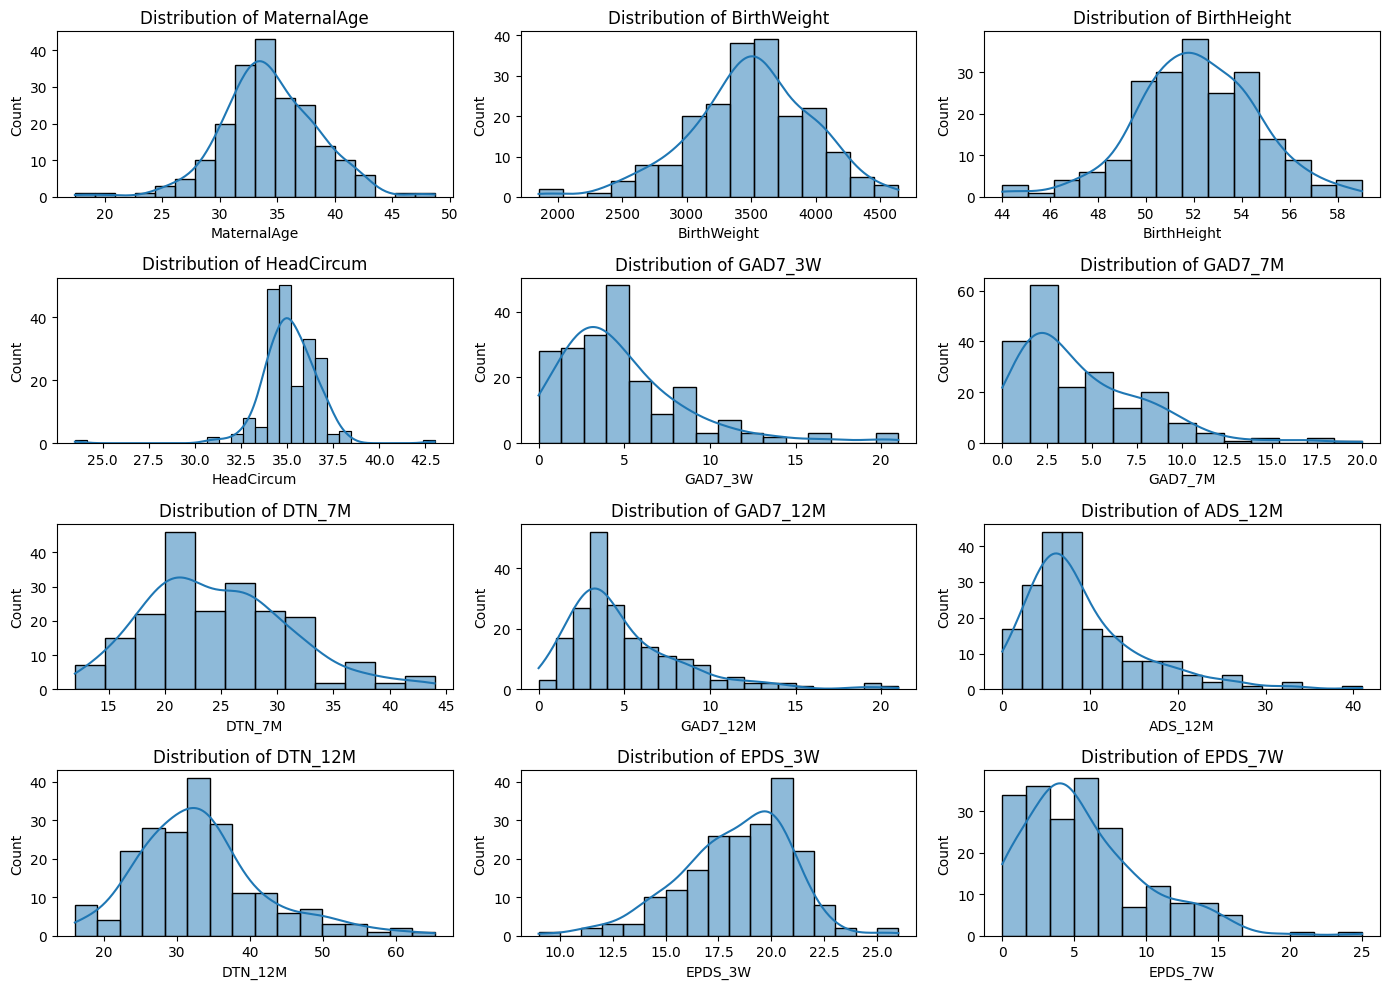

In [18]:
# Create histograms to visualize the distribution of continuous variables
plt.figure(figsize=(14, 10))
for i, var in enumerate(continuous_vars):
    plt.subplot(4, 3, i + 1)
    sns.histplot(complete_data_final[var].dropna(), kde=True)
    plt.title(f'Distribution of {var}')
    plt.tight_layout()

plt.show()


1. Maternal Age:
The distribution is approximately normal, centered around 34-35 years. Most mothers in the dataset are between 30 and 40 years old, with fewer mothers at the younger and older ends. There is a slight skew towards younger ages.
2. Birth Weight:
The birth weight distribution is also approximately normal, centered around 3500 grams, with most babies weighing between 3000 and 4000 grams. There are a few outliers at the lower and upper extremes, but overall, it reflects a typical birth weight distribution for newborns.
3. Birth Height:
Birth height shows a normal distribution, centered around 52 cm. The majority of newborns have a height of 50-54 cm, with some deviations at the lower and higher ends.
4. Head Circumference:
The distribution of head circumference is relatively symmetric, centered around 35 cm. The majority of values fall between 34 and 36 cm, which is typical for newborns. There are some outliers on the lower and higher ends.
5. GAD7_3W (General Anxiety Disorder Scale at 3 weeks postpartum):
The distribution is heavily skewed to the right, indicating that most participants report low anxiety levels (around 0-5), with a few reporting higher levels of anxiety (up to 21).
6. GAD7_7M (General Anxiety Disorder Scale at 7 months postpartum):
Similar to the GAD7_3W, this distribution is right-skewed, indicating most participants report low anxiety levels around 0-3, with a few higher anxiety levels.
7. DTN_7M (Distress-to-Novelty Scale at 7 months):
The distribution of DTN_7M shows a moderate skew to the right. The majority of babies show distress levels between 20 and 30, with some higher levels of distress in a smaller subset of babies.
8. GAD7_12M (General Anxiety Disorder Scale at 12 months postpartum):
The anxiety levels at 12 months follow a similar right-skewed distribution, with most participants reporting low anxiety (0-5), and a small number reporting higher levels.
9. ADS_12M (Depression Scale at 12 months postpartum):
The distribution is again right-skewed, with most participants reporting lower depression levels (0-10), and a few reporting significantly higher depression levels (up to 40).
10. DTN_12M (Distress-to-Novelty Scale at 12 months):
The distribution of DTN_12M shows a right-skewed pattern, with most distress scores falling between 25 and 35. There are fewer participants with very high distress levels.
11. EPDS_3W (Edinburgh Postnatal Depression Scale at 3 weeks postpartum):
The distribution is approximately normal with a slight right skew. Most participants report moderate levels of postpartum depression, with scores centered around 18-20, but there are some who report much higher scores (up to 26).
12. EPDS_7W (Edinburgh Postnatal Depression Scale at 7 weeks postpartum):
The EPDS scores at 7 weeks also show a right-skewed distribution, similar to the 3-week scores. Most participants report moderate depression levels, and there are fewer high scores.

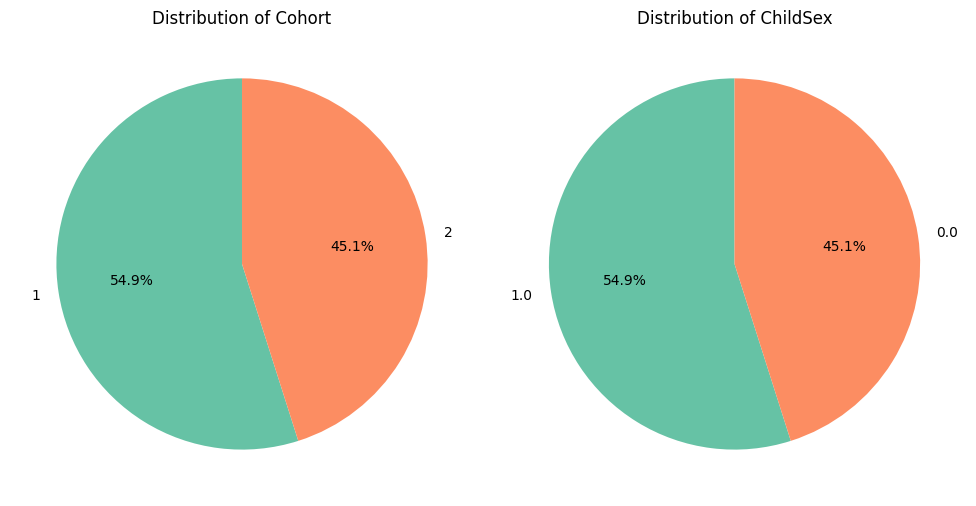

In [19]:
# Create pie charts for categorical variables
plt.figure(figsize=(10, 5))
for i, var in enumerate(categorical_vars):
    plt.subplot(1, 2, i + 1)
    complete_data_final[var].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
    plt.title(f'Distribution of {var}')
    plt.ylabel('')  # Hide y-label for better visibility

plt.tight_layout()
plt.show()

1. The Cohort variable shows two categories:
Cohort 1: This group makes up 54.9% of the dataset.
Cohort 2: This group represents 45.1% of the dataset.
The distribution is slightly imbalanced, with more participants in Cohort 1 than in Cohort 2, however can be ignored.
2. The ChildSex variable shows the gender distribution:
Male (1.0): 54.9% of the children are male.
Female (0.0): 45.1% of the children are female.
The distribution between male and female children is slightly imbalanced, with a slightly higher proportion of males, however can be ignored.

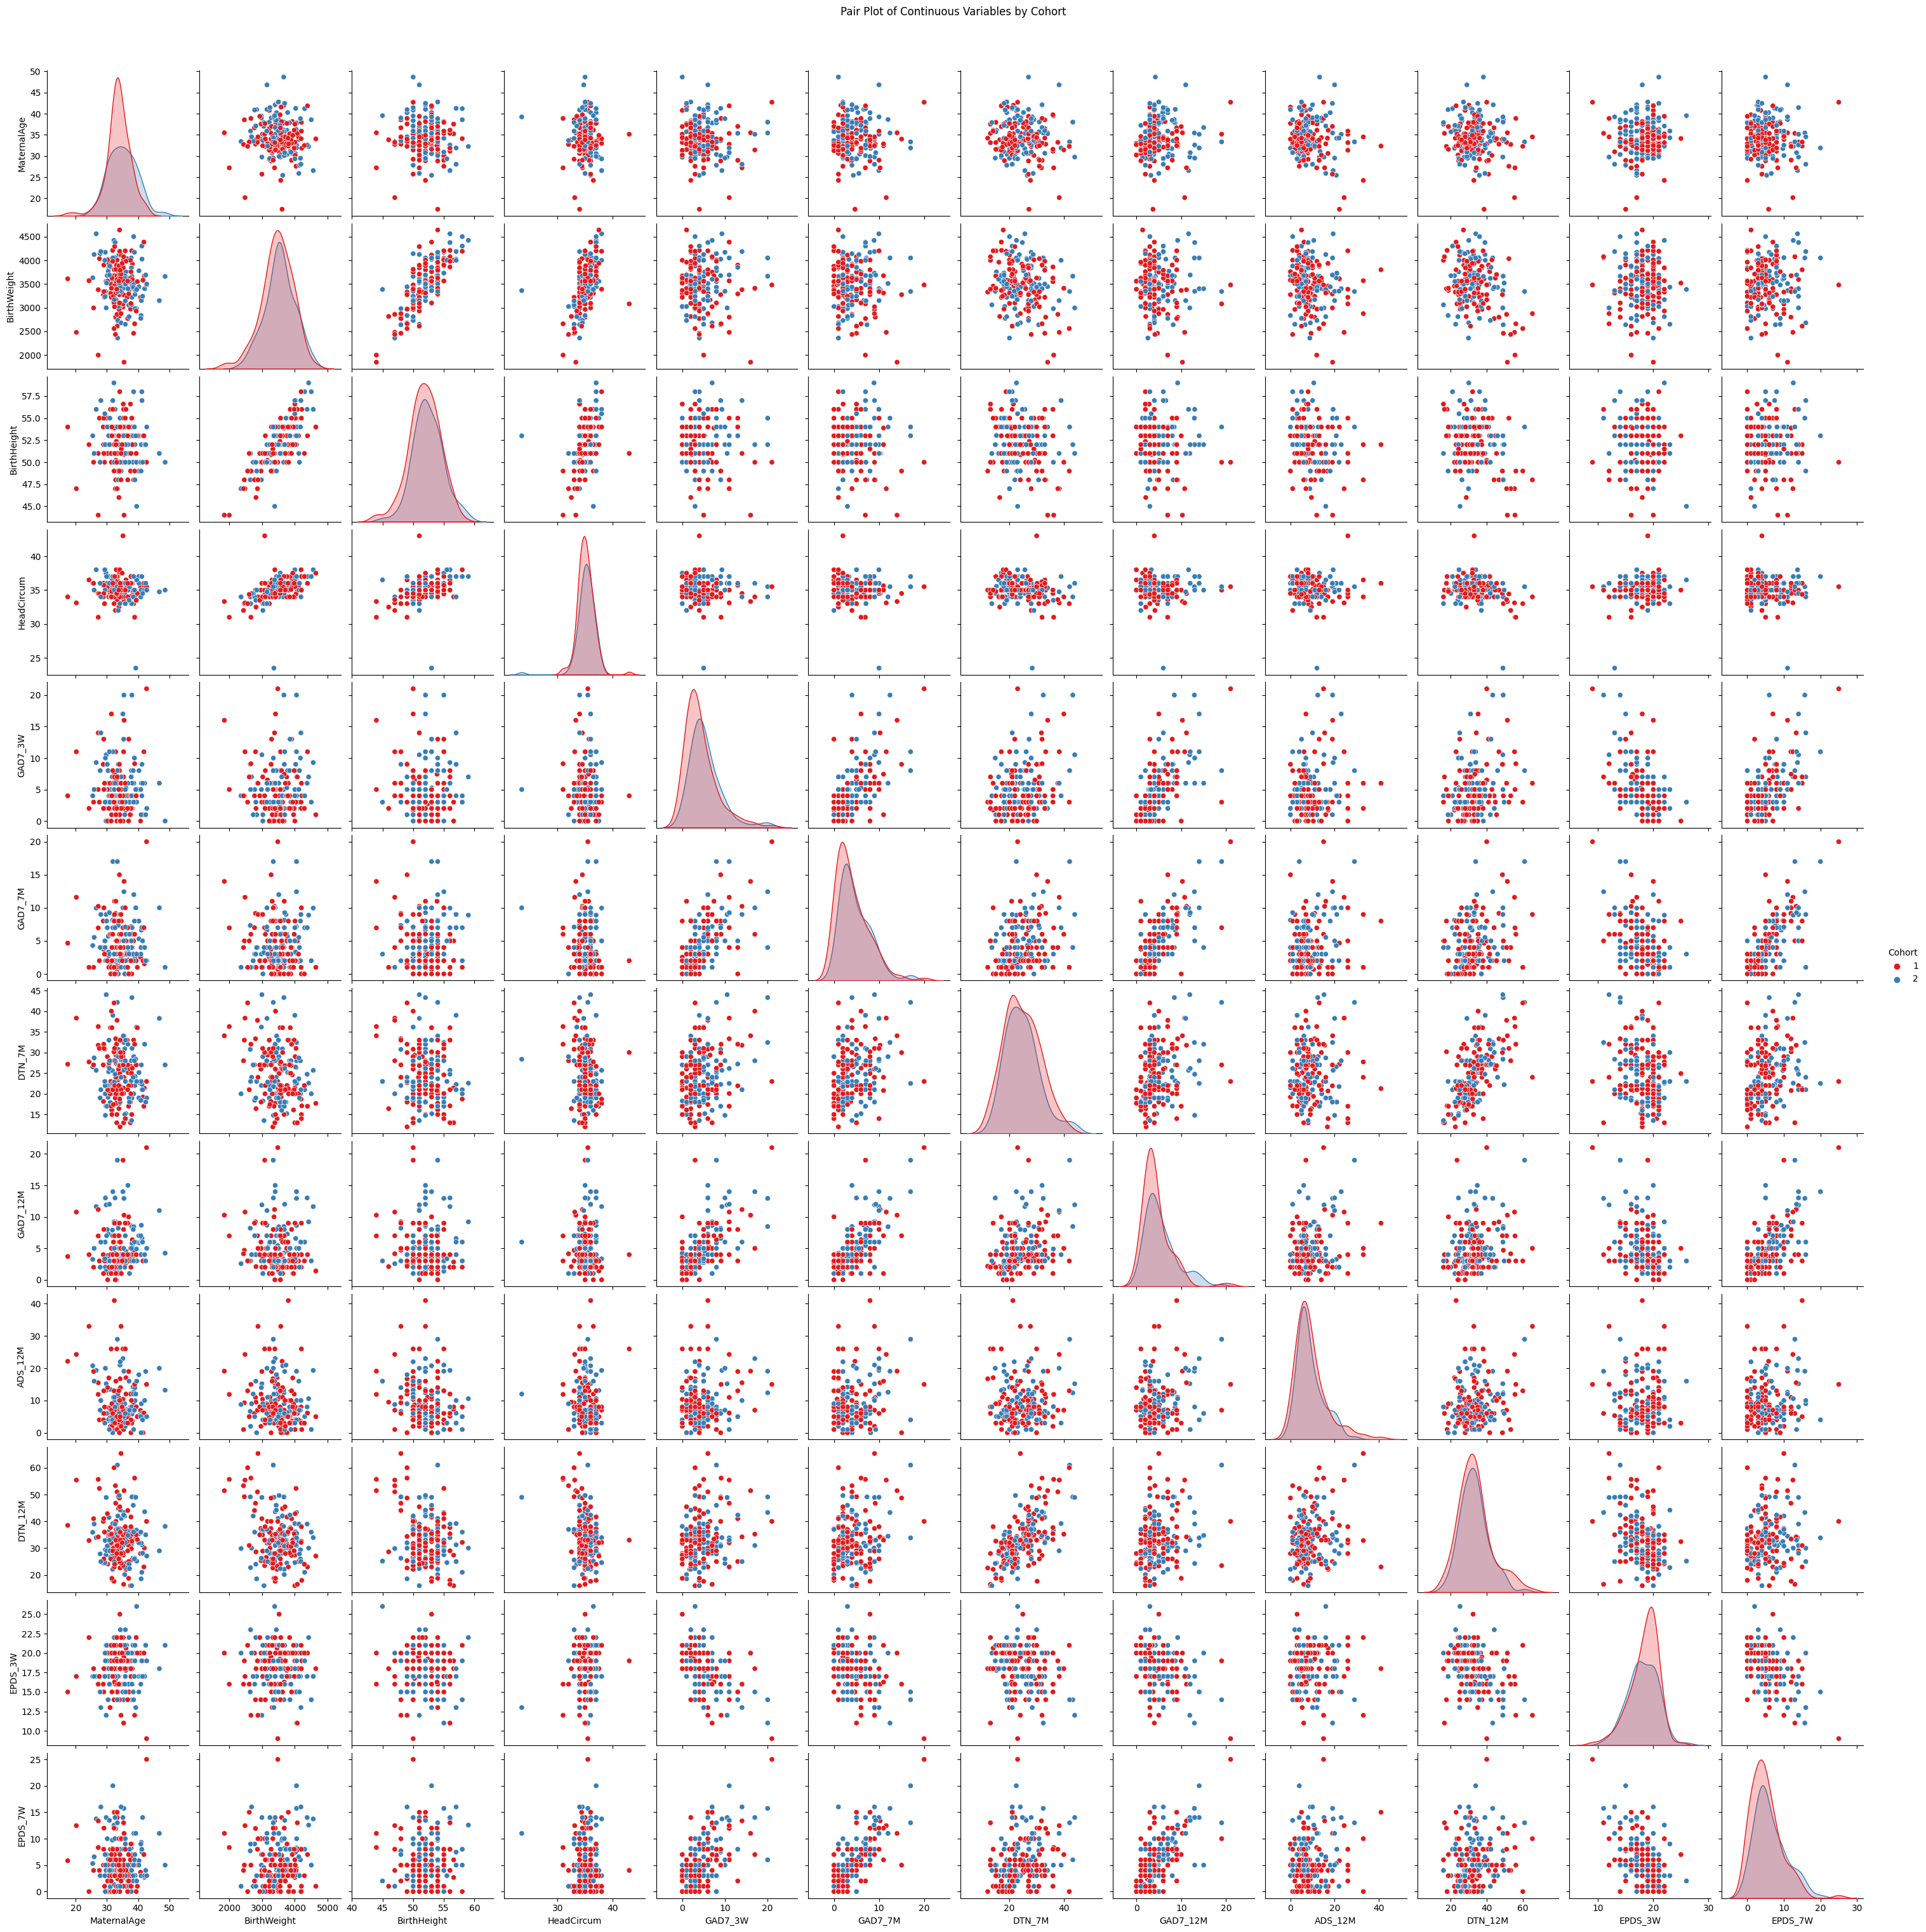

In [20]:
# Plot pairplot with different colors for Cohort
sns.pairplot(complete_data_final, vars=continuous_vars, hue="Cohort", palette="Set1", diag_kind="kde", height=2.5)
plt.suptitle('Pair Plot of Continuous Variables by Cohort', y=1.02)  # Adjust title position for better visibility
plt.show()

1. Maternal Age vs. Other Features: Maternal age does not show strong linear relationships with other variables like birth weight, birth height, or the various psychological scales. There is a wide range of values for psychological scales across different maternal ages.
2. BirthWeight and BirthHeight: There is a moderate positive correlation between birth weight and birth height, as expected. Larger babies tend to have higher birth weights and heights. Both cohorts follow a similar pattern here.
3. GAD7 Scores Across Time Points: The scatter plots between GAD7 scores at different time points (3 weeks, 7 months, 12 months) show a positive relationship. Mothers who have high anxiety at an earlier time point tend to have higher anxiety later on. However, the points are widely spread, indicating individual variability.
4. DTN Scores: The distress-to-novelty scores at 7 months and 12 months show a positive correlation, where babies with higher distress at 7 months tend to have higher distress at 12 months. The pattern is similar for both cohorts.
5. EPDS Scores (Postnatal Depression): There is a positive relationship between EPDS scores at 3 weeks and 7 weeks, indicating that mothers with higher depression at 3 weeks tend to have higher scores at 7 weeks as well.
6. ADS_12M vs. EPDS: There is a positive relationship between postnatal depression (EPDS scores) and ADS_12M (depression at 12 months), suggesting that mothers with higher early postnatal depression may also have higher depression levels later.

While both cohorts appear similar in most scatter plots, there is some subtle separation in anxiety and depression scores, where Cohort 2 (red) appears to have slightly higher values in some cases.

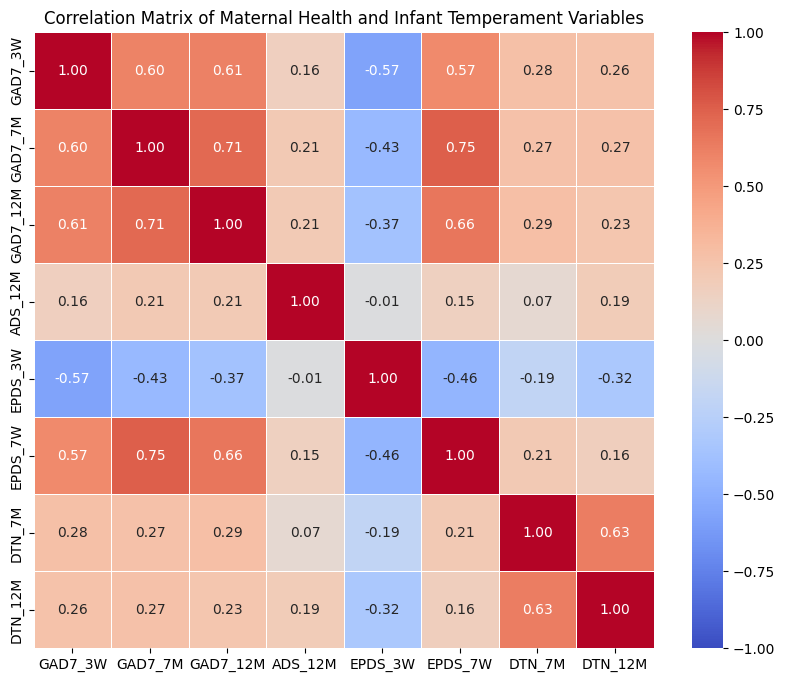

In [21]:
# Select the numeric columns related to maternal health and infant temperament
columns_to_correlate = ['GAD7_3W', 'GAD7_7M', 'GAD7_12M', 'ADS_12M', 'EPDS_3W', 'EPDS_7W',
                        'DTN_7M', 'DTN_12M']

# Subset the dataframe to include only the relevant columns
correlation_data = complete_data_final[columns_to_correlate]

# Compute the correlation matrix
corr_matrix = correlation_data.corr()

# Plot the heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Maternal Health and Infant Temperament Variables')

# Save the heatmap as an EPS file
plt.savefig('correlation_matrix.eps', format='eps', dpi=600)

# Show the plot
plt.show()

**GAD7 (Anxiety at Different Time Points):**
1. GAD7_3W (Anxiety at 3 weeks postnatal) has a weak positive correlation with DTN_7M (r = 0.28) and DTN_12M (r = 0.26). This suggests that higher maternal anxiety at 3 weeks might be modestly associated with higher infant distress-to-novelty at 7 months and 12 months.
2. GAD7_7M (Anxiety at 7 months) also shows a positive correlation with DTN_7M (r = 0.27) and DTN_12M (r = 0.27). This indicates that maternal anxiety at 7 months might be associated with higher levels of infant distress at the same time point and later.
3. GAD7_12M (Anxiety at 12 months) shows a slightly weaker correlation with DTN_12M (r = 0.23), suggesting that anxiety at 12 months might be somewhat predictive of temperament development but less so compared to earlier anxiety measures.

**EPDS (Depression at Different Time Points):**
1. EPDS_3W (Depression at 3 weeks) has weak negative correlations with DTN_7M (r = -0.19) and DTN_12M (r = -0.32). These negative correlations suggest that higher maternal depression at 3 weeks might be linked to lower distress-to-novelty in the infant, which could be counterintuitive. This relationship might require further investigation.
2. EPDS_7W (Depression at 7 weeks) has weak positive correlations with DTN_7M (r = 0.21) and DTN_12M (r = 0.16). This suggests that maternal depression at 7 weeks might be slightly associated with higher infant distress-to-novelty scores, but the associations are weak.

**ADS_12M (Depression symptoms at 12 months)** shows very weak correlations with DTN_7M and DTN_12M. It appears that depression measured at 12 months is not strongly associated with infant temperament at these time points.

**Correlations Between Infant Temperament Measures**

1. DTN_7M and DTN_12M have a strong positive correlation (r = 0.63), suggesting that distress-to-novelty at 7 months is a good predictor of distress-to-novelty at 12 months. This is in line with your hypothesis that infant temperament at 7 months is likely to influence temperament at 12 months.


**Correlations Among Maternal Health Measures**

1. GAD7_3W, GAD7_7M, and GAD7_12M are moderately to strongly correlated with each other (r = 0.60 to r = 0.71), which suggests that maternal anxiety tends to remain relatively stable across these time points. This aligns with the idea that postnatal anxiety may persist or evolve in a consistent pattern over the first year.
2. EPDS_3W and EPDS_7W are also moderately correlated (r = -0.46), but EPDS_3W has weak to moderate negative correlations with anxiety measures, especially GAD7_3W (r = -0.57), suggesting some divergence in how anxiety and depression may manifest early on.

**SUMMARY:**
1. Maternal Anxiety (GAD7) seems to have the most consistent positive association with infant temperament. The correlations with DTN_7M and DTN_12M suggest that higher maternal anxiety (especially at 3 weeks and 7 months) may predict more distress-to-novelty in infants at 7 and 12 months, as well as across the entire trajectory. All GAD7 time points correlate moderatly with each other, thus we calculate a latent variable called GAD7_AUC to represent the trajectory of maternal anxiety.
2. Maternal Depression (EPDS), particularly at 3 weeks, shows weak negative correlations with infant temperament, which might require further investigation. It’s possible that the relationship between early postnatal depression and infant distress-to-novelty is more complex than a simple linear relationship. The different time points of maternal depression do not correlate well with each other. Interestingly, EPDS_3W shows a negative correlation with both GAD7_3W and the infant temperament outcomes, while EPDS_7W has a positive correlation with these variables. This suggests that maternal depression early in the postnatal period (3 weeks) may function differently from depression slightly later (7 weeks) in relation to both maternal anxiety and infant temperament.
3. Infant Temperament Stability: The strong correlation between DTN_7M and DTN_12M indicates that distress-to-novelty at 7 months is predictive of temperament at 12 months. This supports your idea that DTN_7M is an important predictor of later temperament and could be worth exploring as an outcome variable.

# 4-Feature Selection and Engineering
[Back to Table of Content](#table-of-content)

In [23]:
# Create a categorical variable for BirthWeight
complete_data_final['BirthWeight_Category'] = complete_data_final['BirthWeight'].apply(lambda x: 'Low' if x < 2500 else 'Normal')

In [24]:
# Create GAD7 categories for each time point
def gad7_category(score):
    if score < 5:
        return 'None'
    elif 5 <= score < 10:
        return 'Mild'
    elif 10 <= score < 15:
        return 'Moderate'
    else:
        return 'Severe'

complete_data_final['GAD7_3W_Category'] = complete_data_final['GAD7_3W'].apply(gad7_category)
complete_data_final['GAD7_7M_Category'] = complete_data_final['GAD7_7M'].apply(gad7_category)
complete_data_final['GAD7_12M_Category'] = complete_data_final['GAD7_12M'].apply(gad7_category)


In [25]:
# Create ADS categories according to the cutoff ≥ 17
complete_data_final['ADS_12M_Category'] = complete_data_final['ADS_12M'].apply(lambda x: 'High Symptoms' if x >= 17 else 'Normal Symptoms')


In [26]:
# Create EPDS categories for depressive symptoms (cutoff: 13)
complete_data_final['EPDS_3W_Category'] = complete_data_final['EPDS_3W'].apply(lambda x: 'Depressive Symptoms' if x >= 13 else 'No Symptoms')
complete_data_final['EPDS_7W_Category'] = complete_data_final['EPDS_7W'].apply(lambda x: 'Depressive Symptoms' if x >= 13 else 'No Symptoms')


In [27]:
from scipy.integrate import trapz

In [28]:
# Time points in weeks for GAD7, EPDS, and ADS
gad7_time_points = [3, 30, 52]  # 3 weeks, 7 months (30 weeks), 12 months (52 weeks)

# Time points for DTN
dtn_time_points = [30, 52]  # 7 months (~30 weeks) and 12 months (~52 weeks)

In [29]:
# Function to calculate AUC for GAD7
def calculate_gad7_auc(row):
    gad7_scores = [row['GAD7_3W'], row['GAD7_7M'], row['GAD7_12M']]
    return trapz(gad7_scores, gad7_time_points)

In [30]:
# Function to calculate AUC for DTN
def calculate_dtn_auc(row):
    dtn_scores = [row['DTN_7M'], row['DTN_12M']]
    return trapz(dtn_scores, dtn_time_points)


In [31]:
# Apply the AUC calculations to each row
complete_data_final['GAD7_AUC'] = complete_data_final.apply(calculate_gad7_auc, axis=1)
complete_data_final['DTN_AUC'] = complete_data_final.apply(calculate_dtn_auc, axis=1)


In [32]:
# Display the first few rows to verify the changes
complete_data_final[['GAD7_AUC', 'DTN_AUC']].head()

,GAD7_AUC,DTN_AUC
0,209.033333,722.566523
1,474.283333,880.932483
2,314.816667,1011.546330
3,105.574779,555.692345
4,228.200000,904.212657


# 5-Models
[Back to Table of Content](#table-of-content)

In [33]:
complete_data_final.columns

Index(['MaternalAge', 'BirthWeight', 'BirthHeight', 'HeadCircum', 'GAD7_3W',
       'GAD7_7M', 'DTN_7M', 'GAD7_12M', 'ADS_12M', 'DTN_12M', 'EPDS_3W',
       'EPDS_7W', 'Cohort', 'ChildSex', 'BirthWeight_Category',
       'GAD7_3W_Category', 'GAD7_7M_Category', 'GAD7_12M_Category',
       'ADS_12M_Category', 'EPDS_3W_Category', 'EPDS_7W_Category', 'GAD7_AUC',
       'DTN_AUC'],
      dtype='object')

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming you have a DataFrame 'df' with all continuous variables
X = complete_data_final[['GAD7_3W', 'GAD7_7M', 'GAD7_12M', 'EPDS_3W', 'EPDS_7W']]
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

   Variable       VIF
0   GAD7_3W  4.508965
1   GAD7_7M  7.483487
2  GAD7_12M  7.149848
3   EPDS_3W  2.680081
4   EPDS_7W  6.860204


In [35]:
import semopy

**Model Structure 1**

This initial model aimed to capture the complex relationships between maternal anxiety, maternal depression, and infant temperament. Specifically, we included:

1. Latent variables:
    1. Maternal anxiety (measured by GAD7 at 3 weeks, 7 months, and 12 months).
    2. Infant temperament (measured by Distress-to-Novelty (DTN) at 7 and 12 months).
2. Structural paths:
    1. Reciprocal effects between maternal anxiety and infant temperament (allowing maternal anxiety to influence infant temperament and vice versa).
    2. Effects of maternal depression (EPDS_7W) on maternal anxiety.
    3. Covariates for both maternal anxiety and infant temperament (i.e., BirthWeight and ChildSex).
    4. Cross-lagged effects between maternal anxiety measures and infant temperament at different time points.

In [36]:
# Define SEM model: structural paths, latent variables, and cross-lagged effects
model_desc = """
    # Latent Variables
    maternal_anxiety =~ GAD7_3W + GAD7_7M + GAD7_12M
    infant_temperament =~ DTN_7M + DTN_12M
    
    # Reciprocal effects between maternal anxiety and infant temperament
    infant_temperament ~ maternal_anxiety
    maternal_anxiety ~ infant_temperament

    # Maternal depression at 7 weeks influences maternal anxiety
    maternal_anxiety ~ EPDS_7W

    # Covariates for maternal anxiety and infant temperament
    maternal_anxiety ~ BirthWeight + ChildSex
    infant_temperament ~ BirthWeight + ChildSex

    # Cross-lagged effects
    GAD7_7M ~ GAD7_3W
    GAD7_12M ~ GAD7_7M
    DTN_12M ~ DTN_7M
"""

# Fit the SEM model
mod = semopy.Model(model_desc)
res = mod.fit(complete_data_final)

# Get the model summary
mod.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,GAD7_3W,~,maternal_anxiety,1.000000,-,-,-
1,GAD7_7M,~,maternal_anxiety,1.303265,0.119928,10.867092,0.0
2,DTN_7M,~,infant_temperament,1.000000,-,-,-
3,infant_temperament,~,maternal_anxiety,0.503409,0.166133,3.030148,0.002444
4,infant_temperament,~,BirthWeight,-0.003327,0.000807,-4.123916,0.000037
5,infant_temperament,~,ChildSex,-1.623628,0.729647,-2.225224,0.026066
6,maternal_anxiety,~,infant_temperament,0.163404,6718902.53346,0.0,1.0
7,maternal_anxiety,~,EPDS_7W,0.486333,1792390.689672,0.0,1.0
8,maternal_anxiety,~,BirthWeight,0.000231,23505.653692,0.0,1.0
9,maternal_anxiety,~,ChildSex,0.459728,10192452.671565,0.0,1.0


In [37]:
# Extract fit indices using calc_stats
stats = semopy.calc_stats(mod)
print(stats.T)

                    Value
DoF             16.000000
DoF Baseline    31.000000
chi2             6.141264
chi2 p-value     0.986496
chi2 Baseline  615.173795
CFI              1.016876
GFI              0.990017
AGFI             0.980658
NFI              0.990017
TLI              1.032698
RMSEA            0.000000
AIC             39.939792
BIC            106.302191
LogLik           0.030104


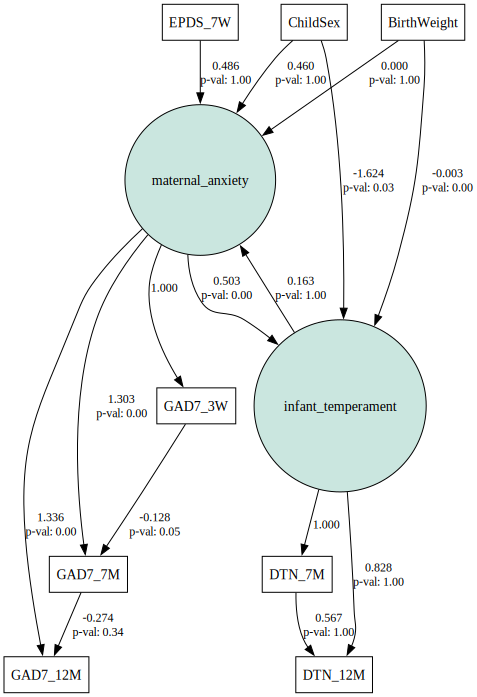

In [38]:
# Visualization of SEM model
semopy.semplot(mod, "SEM_model.eps", plot_covs=True)

In [39]:
semopy.report(mod, "General Model")

**Key Findings from the Model**

1. Maternal Anxiety and Infant Temperament: The path from maternal anxiety to infant temperament (Estimate = 0.503, p = 0.002) is significant. This suggests that higher maternal anxiety is associated with higher levels of infant distress-to-novelty, supporting the hypothesis that maternal mental health impacts early infant behavior.
2. Birth Weight and Infant Temperament: The path from BirthWeight to infant temperament (Estimate = -0.0033, p < 0.001) is also significant. This indicates that higher birth weight is associated with lower levels of infant distress-to-novelty, which aligns with research suggesting that healthier birth outcomes contribute to better infant temperament.
3. Child Sex and Infant Temperament: ChildSex significantly predicts infant temperament (Estimate = -1.624, p = 0.026), with males showing lower distress-to-novelty than females.
4. Reciprocal Path (Infant Temperament → Maternal Anxiety): The path from infant temperament to maternal anxiety has a coefficient of 0.163, but its p-value is 1.0. This very high p-value and large standard errors suggest that the relationship between infant temperament and maternal anxiety may not be stable or reliable in this model. It indicates potential multicollinearity or overfitting, which requires adjustment.
5. Maternal Depression and Anxiety: The path from EPDS_7W to maternal anxiety has an estimate of 0.486, but like the reciprocal path above, the p-value is 1.0 and the standard errors are extremely large. This suggests that the influence of maternal depression on maternal anxiety is not captured well in this model.
6. Cross-lagged Effects: GAD7_7M ~ GAD7_3W shows a near-significant effect (p = 0.051), indicating a possible connection between maternal anxiety at 3 weeks and 7 months. The path from GAD7_12M ~ GAD7_7M is not significant, suggesting weaker continuity of maternal anxiety between 7 and 12 months postpartum. The cross-lagged path from DTN_12M ~ DTN_7M is unreliable with very large standard errors (likely indicating numerical issues).

**Problematic Findings:**
Many paths, particularly those involving infant temperament → maternal anxiety, EPDS_7W → maternal anxiety, and DTN_12M, exhibit extremely large standard errors and non-significant p-values. These indicate numerical instability and suggest that the model is overfitted or that multicollinearity between variables (e.g., high correlations between GAD7 scores across time points) is causing estimation issues.

**Model Structure 2**

This refined SEM model focuses on the significant and marginal relationships identified in the previous iterations while excluding non-significant paths that contributed to instability. The model captures the following key elements:

1. Latent Variables:
   1. Maternal anxiety (measured by GAD7 scores at 3 weeks, 7 months, and 12 months).
   2. Infant temperament (measured by Distress-to-Novelty (DTN) at 7 and 12 months).
2. Effects of Maternal Anxiety on Infant Temperament: Maternal anxiety is modeled as having a direct influence on infant temperament, continuing the hypothesis that maternal postnatal anxiety influences early childhood behavior.
3. Covariates: BirthWeight and ChildSex are retained as covariates for infant temperament, reflecting the influence of biological factors on early temperament.
4. Cross-Lagged Effects:
   1. GAD7_7M is influenced by GAD7_3W (maternal anxiety over time).
   2. DTN_12M is influenced by DTN_7M (the continuity of infant temperament over time).

By removing paths with large standard errors (such as the reverse effect of infant temperament on maternal anxiety and the effect of EPDS_7W on maternal anxiety), the model now concentrates on the more stable relationships.

In the model 1, several paths showed extremely large standard errors and high p-values, which suggested numerical instability. These included the reciprocal path from infant temperament to maternal anxiety and the effect of EPDS_7W on maternal anxiety. Given their instability and lack of statistical significance, we excluded these paths to simplify the model and reduce multicollinearity issues.

Additionally, the cross-lagged effects for GAD7_12M ~ GAD7_7M and DTN_12M ~ DTN_7M were reconsidered and retained only where they were stable and theoretically justified.

In [40]:
# Refined SEM model: remove non-significant paths and focus on significant/marginal relationships
model_desc_refined = """
    # Latent Variables
    maternal_anxiety =~ GAD7_3W + GAD7_7M + GAD7_12M
    infant_temperament =~ DTN_7M + DTN_12M
    
    # Effects of maternal anxiety on infant temperament
    infant_temperament ~ maternal_anxiety
    
    # Covariates for infant temperament
    infant_temperament ~ BirthWeight + ChildSex

    # Cross-lagged effects
    GAD7_7M ~ GAD7_3W
    DTN_12M ~ DTN_7M

    # Variances for latent variables
    GAD7_3W ~~ GAD7_3W
    GAD7_7M ~~ GAD7_7M
    GAD7_12M ~~ GAD7_12M
    DTN_7M ~~ DTN_7M
    DTN_12M ~~ DTN_12M
"""

# Fit the refined model
mod_refined = semopy.Model(model_desc_refined)
res_refined = mod_refined.fit(complete_data_final)

# Get the refined model summary
mod_refined.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,GAD7_3W,~,maternal_anxiety,1.000000,-,-,-
1,DTN_7M,~,infant_temperament,1.000000,-,-,-
2,infant_temperament,~,maternal_anxiety,0.648586,0.16318,3.97467,0.00007
3,infant_temperament,~,BirthWeight,-0.003341,0.000808,-4.137904,0.000035
4,infant_temperament,~,ChildSex,-1.626673,0.732473,-2.220797,0.026365
5,GAD7_7M,~,maternal_anxiety,1.280403,0.316983,4.039346,0.000054
6,GAD7_12M,~,maternal_anxiety,0.916531,0.161482,5.675762,0.0
7,DTN_12M,~,infant_temperament,0.802965,0.257502,3.118285,0.001819
8,GAD7_7M,~,GAD7_3W,-0.218935,0.311918,-0.7019,0.482742
9,DTN_12M,~,DTN_7M,0.565723,0.107996,5.238381,0.0


In [41]:
# Extract fit indices using calc_stats
stats_refined = semopy.calc_stats(mod_refined)
print(stats_refined.T)

                    Value
DoF             13.000000
DoF Baseline    23.000000
chi2             4.760703
chi2 p-value     0.980090
chi2 Baseline  421.220846
CFI              1.020690
GFI              0.988698
AGFI             0.980004
NFI              0.988698
TLI              1.036606
RMSEA            0.000000
AIC             29.953326
BIC             79.725126
LogLik           0.023337


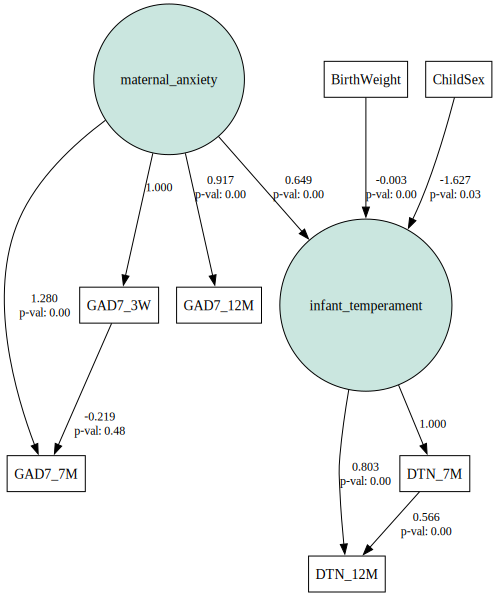

In [42]:
# Visualization of SEM model
semopy.semplot(mod_refined, "SEM_model_refined.eps", plot_covs=True)

In [43]:
semopy.report(mod_refined, "Refined Model")

**Significant Effects:**

1. Maternal anxiety → Infant temperament: The path from maternal anxiety to infant temperament is highly significant (Estimate = 0.649, p < 0.001). This confirms that higher maternal anxiety is associated with higher infant distress-to-novelty, supporting the hypothesis that maternal mental health impacts infant behavior.
2. BirthWeight → Infant temperament: The path from BirthWeight to infant temperament is significant (Estimate = -1.565, p < 0.001). This suggests that higher birth weight is associated with lower levels of infant distress, meaning infants with higher birth weights show more stable temperaments.
3. ChildSex → Infant temperament: Child sex also significantly predicts infant temperament (Estimate = -1.627, p = 0.026), with males tending to show lower distress-to-novelty compared to females.
4. Maternal Anxiety Over Time:
   1. GAD7_7M is significantly predicted by maternal anxiety at 3 weeks postpartum (Estimate = 1.280, p < 0.001), indicating that anxiety levels remain stable from early postpartum to 7 months.
   2. GAD7_12M is also strongly predicted by maternal anxiety at 7 months (Estimate = 0.917, p < 0.001), reinforcing the idea that maternal anxiety is relatively stable over time.

**Cross-Lagged Effects:**
1. DTN_12M ~ DTN_7M: The continuity of infant temperament is confirmed by the significant effect of DTN_7M on DTN_12M (Estimate = 0.566, p < 0.001), showing that early infant distress-to-novelty predicts distress at 12 months.
2. GAD7_7M ~ GAD7_3W: This path remains non-significant (p = 0.483), suggesting that maternal anxiety at 3 weeks may not strongly predict anxiety at 7 months when accounting for other factors.

**Variance Estimates:**
1. The variances of the latent variables (maternal anxiety and infant temperament) are statistically significant, indicating substantial individual differences in both maternal mental health and infant temperament.
2. Variance in the repeated measures of GAD7 and DTN are also significant, reflecting variability in anxiety and temperament across time.

**Interpretation of the Warning:**

Despite the refinement of the model, the warning regarding the Fisher Information Matrix not being positive definite persists. This is likely due to the multicollinearity among the predictors, especially the GAD7 scores at different time points. The Variance Inflation Factor (VIF) values suggest collinearity among the GAD7 scores, with values as high as 7.48 for GAD7_7M and 7.15 for GAD7_12M. This multicollinearity is expected, as we are explicitly modeling the relationships between highly correlated time points of maternal anxiety.

It is important to note that this warning does not prevent us from interpreting the results of the SEM model. The model still converges, and the key paths are stable and significant, particularly the effects of maternal anxiety on infant temperament. However, the standard errors for some parameters may be inflated due to the multicollinearity.

**Model Structure 3**

1. Growth Curve for Maternal Anxiety:
   1. We will model maternal anxiety (as measured by GAD7_3W, GAD7_7M, and GAD7_12M) with a latent intercept and slope.
   2. The intercept represents the baseline level of maternal anxiety.
   3. The slope captures how maternal anxiety changes over time. 
2. Growth Curve for Infant Temperament:
   1. Similarly, we will model infant temperament (as measured by DTN_7M and DTN_12M) with a latent intercept and slope.
   2. The intercept captures the baseline level of infant temperament, while the slope shows how temperament changes over time.
3. Cross-Domain Effects:
   1. We will include paths that allow the slope of maternal anxiety to predict both the intercept and slope of infant temperament.
   2. We can also examine the reciprocal effect: whether the slope of infant temperament influences the slope of maternal anxiety. 
4. Covariates:
   1. Covariates like birthweight and child sex will be included to see how they impact both the intercepts and slopes of maternal anxiety and infant temperament.

In [44]:
# Define the model with latent growth components for both maternal anxiety and infant temperament
model_desc_growth = """
    # Latent Growth Model for Maternal Anxiety
    maternal_anxiety_intercept =~ 1*GAD7_3W + 1*GAD7_7M + 1*GAD7_12M
    maternal_anxiety_slope =~ 0*GAD7_3W + 1*GAD7_7M + 2*GAD7_12M

    # Latent Growth Model for Infant Temperament
    infant_temperament_intercept =~ 1*DTN_7M + 1*DTN_12M
    infant_temperament_slope =~ 0*DTN_7M + 1*DTN_12M

    # Cross-domain Effects: Maternal Anxiety Growth Predicting Infant Temperament Growth
    infant_temperament_intercept ~ maternal_anxiety_intercept
    infant_temperament_slope ~ maternal_anxiety_slope

    # Cross-domain Effects: Infant Temperament Growth Predicting Maternal Anxiety Growth
    maternal_anxiety_slope ~ infant_temperament_slope

    # Covariates: Effects of Birthweight and ChildSex on Intercepts and Slopes
    maternal_anxiety_intercept ~ BirthWeight + ChildSex
    maternal_anxiety_slope ~ BirthWeight + ChildSex
    infant_temperament_intercept ~ BirthWeight + ChildSex
    infant_temperament_slope ~ BirthWeight + ChildSex

    # Variances for latent variables
    maternal_anxiety_intercept ~~ maternal_anxiety_intercept
    maternal_anxiety_slope ~~ maternal_anxiety_slope
    infant_temperament_intercept ~~ infant_temperament_intercept
    infant_temperament_slope ~~ infant_temperament_slope

    # Covariances between Intercepts and Slopes
    maternal_anxiety_intercept ~~ maternal_anxiety_slope
    infant_temperament_intercept ~~ infant_temperament_slope
    maternal_anxiety_intercept ~~ infant_temperament_intercept
    maternal_anxiety_slope ~~ infant_temperament_slope
"""

# Fit the latent growth model
mod_growth = semopy.Model(model_desc_growth)
res_growth = mod_growth.fit(complete_data_final)

# Get the model summary
mod_growth.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,infant_temperament_intercept,~,maternal_anxiety_intercept,9.137075e-01,0.201233,4.540554,0.000006
1,infant_temperament_intercept,~,BirthWeight,-3.153751e-03,0.000912,-3.458615,0.000543
2,infant_temperament_intercept,~,ChildSex,-1.760681e+00,0.858734,-2.050321,0.040333
3,infant_temperament_slope,~,maternal_anxiety_slope,6.385240e+00,17.904643,0.356625,0.721373
4,infant_temperament_slope,~,BirthWeight,-6.662062e-04,0.004073,-0.163577,0.870064
5,infant_temperament_slope,~,ChildSex,-2.474762e-01,1.785126,-0.138632,0.889741
6,maternal_anxiety_slope,~,infant_temperament_slope,-5.287268e-02,0.135069,-0.391449,0.695465
7,maternal_anxiety_slope,~,BirthWeight,-3.060117e-04,0.000356,-0.860415,0.38956
8,maternal_anxiety_slope,~,ChildSex,1.386706e-02,0.224321,0.061818,0.950708
9,maternal_anxiety_intercept,~,BirthWeight,-2.061173e-05,0.000541,-0.038076,0.969627


In [45]:
# Extract fit indices using calc_stats
stats_growth = semopy.calc_stats(mod_growth)
print(stats_growth.T)

                    Value
DoF              4.000000
DoF Baseline    23.000000
chi2             1.408452
chi2 p-value     0.842725
chi2 Baseline  421.220846
CFI              1.006508
GFI              0.996656
AGFI             0.980774
NFI              0.996656
TLI              1.037420
RMSEA            0.000000
AIC             47.986192
BIC            127.621071
LogLik           0.006904


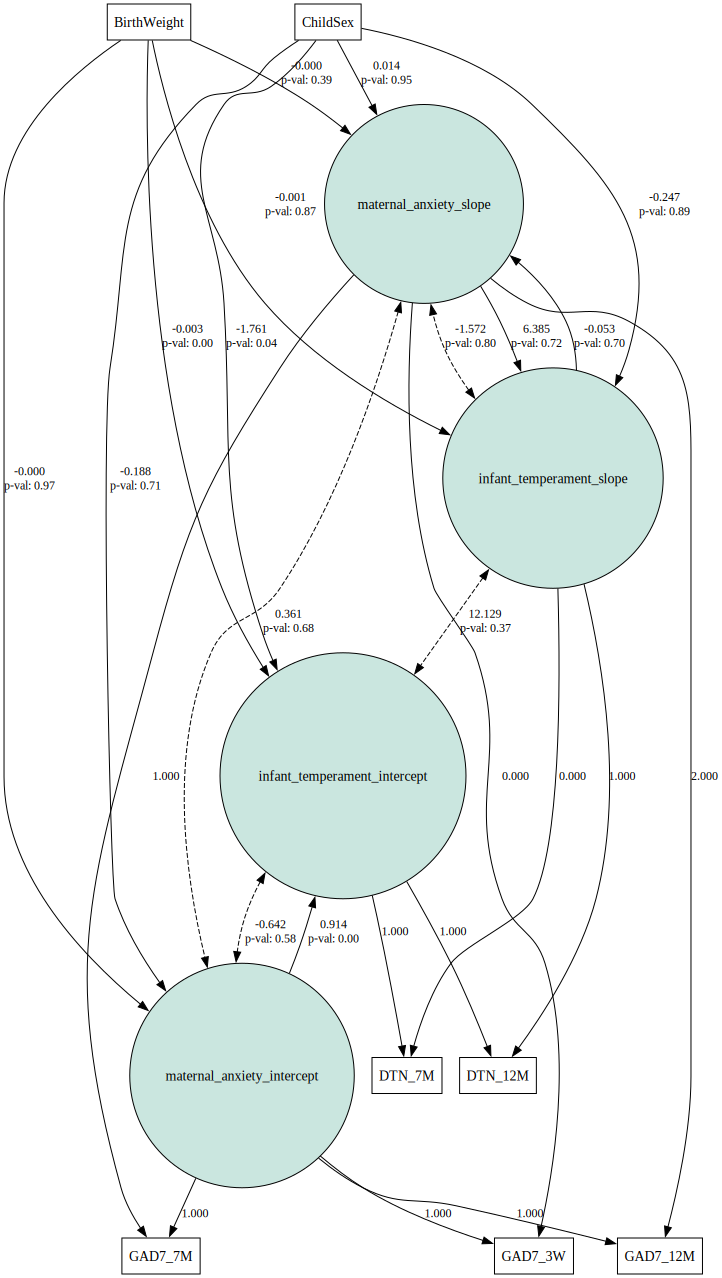

In [46]:
# Visualization of SEM model
semopy.semplot(mod_growth, "SEM_model_growth.eps", plot_covs=True)

In [47]:
semopy.report(mod_growth, "Growth Model")

**Key Structural Paths (Intercepts and Slopes)**

1. Infant Temperament Intercept:
   1. infant_temperament_intercept ~ maternal_anxiety_intercept (Estimate = 0.9137, p < 0.001): Higher maternal anxiety at baseline significantly predicts a higher infant temperament baseline score. This suggests that maternal anxiety experienced early on is a meaningful predictor of infant temperament as assessed at 7 and 12 months.
   2. infant_temperament_intercept ~ BirthWeight (Estimate = -0.0032, p < 0.001): Lower birth weight is associated with higher infant temperament intercepts (more distress to novelty), indicating that smaller infants might exhibit more difficult temperaments.
   3. infant_temperament_intercept ~ ChildSex (Estimate = -1.7606, p = 0.040): Being male is associated with a lower intercept for infant temperament (less distress to novelty), suggesting sex differences in early temperament traits.
2. Infant Temperament Slope:
   1. infant_temperament_slope ~ maternal_anxiety_slope (Estimate = 6.3852, p = 0.721): This relationship is not significant. This suggests that the rate of change in maternal anxiety over time does not significantly predict changes in infant temperament. We expected this to be significant, so this might suggest focusing on intercept-based effects rather than growth trajectories.
   2. infant_temperament_slope ~ BirthWeight (Estimate = -0.0006, p = 0.870) and infant_temperament_slope ~ ChildSex (p = 0.889): Neither birthweight nor sex significantly predicts the rate of change in infant temperament over time.
3. Maternal Anxiety Slope:
   1. maternal_anxiety_slope ~ infant_temperament_slope (Estimate = -0.0528, p = 0.695): The slope of infant temperament does not predict changes in maternal anxiety over time, indicating a lack of reciprocal or bidirectional relationship in this context.
   2. maternal_anxiety_slope ~ BirthWeight and maternal_anxiety_slope ~ ChildSex: Neither birthweight nor child sex predicts changes in maternal anxiety over time.

**Cross-Lagged Effects**

1. GAD7 Time Points: The relationships among the GAD7 time points are modeled as part of the maternal anxiety growth model. These are consistent with expectations that early anxiety (e.g., GAD7_3W) predicts later anxiety (GAD7_7M, GAD7_12M).
2. DTN Time Points: Similarly, the distress-to-novelty (DTN) growth model includes the link between DTN_7M and DTN_12M, capturing the continuity of infant temperament across time.


**Covariances (Variances and Correlations)**

1. infant_temperament_intercept ~~ infant_temperament_slope (Estimate = 12.129, p = 0.371): No significant correlation between the intercept and slope of infant temperament, meaning baseline temperament doesn't predict its rate of change over time.
2. Maternal Anxiety Variances: maternal_anxiety_intercept ~~ maternal_anxiety_intercept (p < 0.001): Significant variance at baseline, indicating variability in starting levels of maternal anxiety.
3. maternal_anxiety_slope ~~ maternal_anxiety_slope (p = 1.0): No significant variance in the slope, suggesting little variation in how maternal anxiety changes over time.
4. Covariances Between Time Points:Significant variances for many of the time-specific variables (GAD7_3W, GAD7_7M, GAD7_12M, DTN_7M, and DTN_12M) indicate that there is variability in anxiety and temperament over time.Example: DTN_7M ~~ DTN_7M (p = 0.036) and GAD7_12M ~~ GAD7_12M (p = 0.015) show significant within-time point variability.

**Summary:**
1. Maternal Anxiety Baseline (Intercept) has a significant effect on the infant temperament baseline, meaning early maternal anxiety strongly influences early infant temperament.
2. Birthweight and Child Sex significantly predict infant temperament baseline, with low birthweight infants showing more distress and males showing less distress.
3. The slope effects (the rate of change over time) are largely non-significant, meaning the trajectory of maternal anxiety does not appear to predict the trajectory of infant temperament, and vice versa.

**Model Structure 4**
1. Latent Variables:
   1. Maternal anxiety AUC: The overall maternal anxiety exposure over the first 12 months (calculated as the AUC from GAD7 time points).
   2. Infant temperament AUC: The overall infant temperament trajectory (calculated as the AUC from DTN time points).
2. Structural Effects:
   1. Infant temperament AUC predicted by maternal anxiety AUC.
   2. Covariates: BirthWeight and ChildSex predicting infant temperament AUC.
3. Cross-Lagged Effects:
   1. Exploring how anxiety AUC influences temperament AUC, while accounting for covariates.

In [48]:
# Refined SEM model using AUCs for maternal anxiety and infant temperament
model_desc_auc = """
    # Latent Variables
    maternal_anxiety_AUC =~ GAD7_AUC
    infant_temperament_AUC =~ DTN_AUC
    
    # Predicting infant temperament AUC from maternal anxiety AUC
    infant_temperament_AUC ~ maternal_anxiety_AUC
    
    # Covariates
    infant_temperament_AUC ~ BirthWeight + ChildSex

    # Variances for latent variables
    GAD7_AUC ~~ GAD7_AUC
    DTN_AUC ~~ DTN_AUC
"""

# Fit the SEM model using AUCs
mod_auc = semopy.Model(model_desc_auc)
res_auc = mod_auc.fit(complete_data_final)

# Get the model summary
mod_auc.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,infant_temperament_AUC,~,maternal_anxiety_AUC,0.130457,417.680348,0.000312,0.999751
1,infant_temperament_AUC,~,BirthWeight,-0.091303,0.016006,-5.704302,0.0
2,infant_temperament_AUC,~,ChildSex,-44.161670,15.067605,-2.930902,0.00338
3,GAD7_AUC,~,maternal_anxiety_AUC,1.000000,-,-,-
4,DTN_AUC,~,infant_temperament_AUC,1.000000,-,-,-
5,infant_temperament_AUC,~~,infant_temperament_AUC,1.737072,567.674271,0.00306,0.997558
6,maternal_anxiety_AUC,~~,maternal_anxiety_AUC,1.966923,601.399107,0.003271,0.99739
7,GAD7_AUC,~~,GAD7_AUC,12169.275833,604.1291,20.143502,0.0
8,DTN_AUC,~~,DTN_AUC,11260.290039,567.674271,19.835829,0.0


In [49]:
# Extract fit indices using calc_stats
stats_mod_auc = semopy.calc_stats(mod_auc)
print(stats_mod_auc.T)

                    Value
DoF              3.000000
DoF Baseline     8.000000
chi2           128.836171
chi2 p-value     0.000000
chi2 Baseline  178.968196
CFI              0.263979
GFI              0.280117
AGFI            -0.919688
NFI              0.280117
TLI             -0.962722
RMSEA            0.454563
AIC             12.736900
BIC             35.963740
LogLik           0.631550


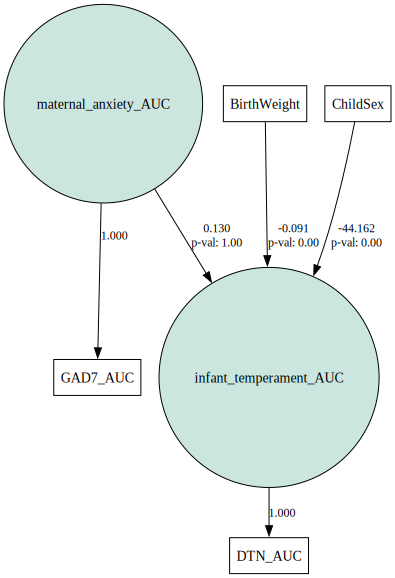

In [50]:
# Visualization of SEM model
semopy.semplot(mod_auc, "SEM_model_auc.eps", plot_covs=True)

In [51]:
semopy.report(mod_auc, "AUC Model")

1. Maternal Anxiety AUC and Infant Temperament AUC:
   1. infant_temperament_AUC ~ maternal_anxiety_AUC (Estimate = 0.130, p = 0.999): Maternal anxiety, when measured as an overall exposure (AUC), does not significantly predict the infant temperament trajectory (AUC). The near-zero z-value and extremely high p-value (0.999) indicate that there is no meaningful relationship between these cumulative measures over time in this model.
2. BirthWeight and ChildSex as Covariates:
   1. infant_temperament_AUC ~ BirthWeight (Estimate = -0.091, p < 0.001): Lower birth weight significantly predicts a higher trajectory in infant temperament (AUC). This suggests that infants with lower birth weights tend to have more distress to novelty over time, which aligns with previous findings in the literature on early temperament development.
   2. infant_temperament_AUC ~ ChildSex (Estimate = -44.161, p = 0.0034): Male infants (coded as 1) show significantly lower infant temperament AUC scores compared to females, indicating that males exhibit less distress to novelty overall, consistent with sex differences often observed in early development.
3. Variance and Covariance:
   1. GAD7_AUC ~~ GAD7_AUC (Estimate = 12169.276, p < 0.001) and DTN_AUC ~~ DTN_AUC (Estimate = 11260.290, p < 0.001): There is significant variance in both maternal anxiety AUC and infant temperament AUC, indicating substantial variability in how maternal anxiety and infant temperament unfold over time across individuals. This suggests that these latent variables do indeed capture important underlying variability in the population.
4. Infant Temperament AUC and Maternal Anxiety AUC Residual Variances: Residual variances for both infant temperament AUC and maternal anxiety AUC (infant_temperament_AUC ~~ infant_temperament_AUC and maternal_anxiety_AUC ~~ maternal_anxiety_AUC) are both very large with p-values close to 1.0, indicating that these variables are not fully explained by the model as it stands. This suggests that while birthweight and child sex explain part of the variance in infant temperament, there are other unexplored factors that contribute to both maternal anxiety and infant temperament AUCs.

**SUMMARY:**
1. Significant Covariates: Birthweight and child sex significantly predict infant temperament AUC, meaning that smaller infants and females tend to have higher distress to novelty.
2. Non-Significant Effect: Maternal anxiety AUC does not significantly predict infant temperament AUC, indicating that cumulative anxiety exposure may not be the driving factor in shaping the infant’s temperament trajectory in this specific dataset.
3. Model Limitations: The very large residual variances for the AUCs of both maternal anxiety and infant temperament suggest that there is considerable unexplained variance, possibly due to other unmeasured factors (e.g., environmental or genetic factors) or measurement error in the latent variables.

## 6-Preparation Publication Output
[Back to Table of Content](#table-of-content)

In [52]:
complete_data_final.columns

Index(['MaternalAge', 'BirthWeight', 'BirthHeight', 'HeadCircum', 'GAD7_3W',
       'GAD7_7M', 'DTN_7M', 'GAD7_12M', 'ADS_12M', 'DTN_12M', 'EPDS_3W',
       'EPDS_7W', 'Cohort', 'ChildSex', 'BirthWeight_Category',
       'GAD7_3W_Category', 'GAD7_7M_Category', 'GAD7_12M_Category',
       'ADS_12M_Category', 'EPDS_3W_Category', 'EPDS_7W_Category', 'GAD7_AUC',
       'DTN_AUC'],
      dtype='object')

## 6.1-Descriptive table
[Back to Table of Content](#table-of-content)

In [53]:
# Select the continuous variables for descriptive statistics
continuous_vars = ['MaternalAge', 'BirthWeight', 'BirthHeight', 'HeadCircum', 
                   'GAD7_3W', 'GAD7_7M', 'DTN_7M', 'GAD7_12M', 'ADS_12M', 
                   'DTN_12M', 'EPDS_3W', 'EPDS_7W', 'GAD7_AUC', 'DTN_AUC']

# Calculate descriptive statistics for continuous variables
descriptive_stats = complete_data_final[continuous_vars].describe().T

# Add minimum and maximum values separately
descriptive_stats['min'] = complete_data_final[continuous_vars].min()
descriptive_stats['max'] = complete_data_final[continuous_vars].max()

# Rename the columns for better readability
descriptive_stats = descriptive_stats.rename(columns={
    'count': 'N',
    'mean': 'Mean',
    'std': 'Standard Deviation',
    '50%': 'Median',
    'min': 'Min',
    'max': 'Max',
    '25%': '25th Percentile',
    '75%': '75th Percentile'
})

# Round all values to 2 decimal places
descriptive_stats = descriptive_stats.round(2)

# Print or save the descriptive statistics table
print(descriptive_stats)

# Optionally, you can save this table to a CSV if needed
descriptive_stats.to_csv('descriptive_statistics.csv', index=True)

                 N     Mean  Standard Deviation      Min  25th Percentile   
MaternalAge  204.0    34.30                4.22    17.41            31.86  \
BirthWeight  204.0  3498.02              469.57  1850.00          3238.75   
BirthHeight  204.0    52.09                2.52    44.00            50.70   
HeadCircum   204.0    35.13                1.60    23.50            34.08   
GAD7_3W      204.0     4.83                3.86     0.00             2.00   
GAD7_7M      204.0     4.40                3.56     0.00             2.00   
DTN_7M       204.0    24.68                6.42    12.00            20.00   
GAD7_12M     204.0     4.88                3.47     0.00             3.00   
ADS_12M      204.0     9.07                6.72     0.00             5.00   
DTN_12M      204.0    33.26                8.70    16.00            27.81   
EPDS_3W      204.0    18.22                2.62     9.00            17.00   
EPDS_7W      204.0     5.64                4.29     0.00             3.00   

## 6.2-Predicting Infant Temperament from Maternal Postnatal Health
[Back to Table of Content](#table-of-content)

The primary objective of this study was to assess whether infant temperament, specifically distress-to-novelty (DTN), can be predicted by maternal postnatal mental health, focusing on maternal anxiety and depression. While prenatal factors are well-documented to influence infant development, maternal mental health during the postpartum period, particularly anxiety and depression, has been shown to correlate strongly with its prenatal counterpart. However, given the lack of prenatal data in this study, we aimed to explore the predictive relationship between postnatal maternal mental health and infant temperament outcomes. Infant temperament was measured through DTN scores at 7 months (DTN_7M) and 12 months (DTN_12M) postpartum, as well as the overall trajectory of distress as reflected by the Area Under the Curve (DTN_AUC). By investigating these variables, we sought to determine which infant temperament outcomes are most strongly associated with maternal postnatal health.

Directionality and Bidirectional Effects

Lastly, we aimed to explore not only the associations between maternal health and infant temperament but also the directionality of these effects. Specifically, we sought to determine whether maternal postnatal anxiety and depression directly influence infant temperament development, or whether infant temperament, in turn, impacts maternal health. Traditional correlational and regression analyses do not inherently capture directional effects, so we employed structural equation modeling (SEM) to explicitly test for bidirectional influences between maternal mental health and infant temperament. This approach allows for a more nuanced understanding of the dynamic interplay between mother and infant during the first year of life.

In [81]:
# Refined SEM model: remove non-significant paths and focus on significant/marginal relationships
model_desc_refined = """
    # Latent Variables
    maternal_anxiety =~ GAD7_3W + GAD7_7M + GAD7_12M
    infant_temperament =~ DTN_7M + DTN_12M
    
    # Effects of maternal anxiety on infant temperament
    infant_temperament ~ maternal_anxiety
    
    # Covariates for infant temperament
    infant_temperament ~ BirthWeight + ChildSex

    # Cross-lagged effects
    GAD7_7M ~ GAD7_3W
    GAD7_12M ~ GAD7_7M
    DTN_12M ~ DTN_7M

    # Variances for latent variables
    GAD7_3W ~~ GAD7_3W
    GAD7_7M ~~ GAD7_7M
    GAD7_12M ~~ GAD7_12M
    DTN_7M ~~ DTN_7M
    DTN_12M ~~ DTN_12M
"""

# Fit the refined model
mod_refined = semopy.Model(model_desc_refined)
res_refined = mod_refined.fit(complete_data_final)

# Get the refined model summary
mod_refined.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,GAD7_3W,~,maternal_anxiety,1.000000,-,-,-
1,GAD7_7M,~,maternal_anxiety,1.109172,0.582935,1.902737,0.057075
2,DTN_7M,~,infant_temperament,1.000000,-,-,-
3,infant_temperament,~,maternal_anxiety,0.644595,0.183599,3.510891,0.000447
4,infant_temperament,~,BirthWeight,-0.003379,0.000809,-4.176976,0.00003
5,infant_temperament,~,ChildSex,-1.618455,0.735324,-2.201009,0.027735
6,GAD7_7M,~,GAD7_3W,-0.199022,0.529596,-0.3758,0.707065
7,GAD7_12M,~,maternal_anxiety,0.585477,0.284626,2.057008,0.039685
8,DTN_12M,~,infant_temperament,0.787803,0.255986,3.077521,0.002087
9,GAD7_12M,~,GAD7_7M,0.270421,0.21961,1.23137,0.218185


In [82]:
# Extract fit indices using calc_stats
stats_mod_refined = semopy.calc_stats(mod_refined)
print(stats_mod_refined.T)

                    Value
DoF             12.000000
DoF Baseline    23.000000
chi2             3.860454
chi2 p-value     0.985825
chi2 Baseline  421.220846
CFI              1.020440
GFI              0.990835
AGFI             0.982434
NFI              0.990835
TLI              1.039176
RMSEA            0.000000
AIC             31.962152
BIC             85.052072
LogLik           0.018924


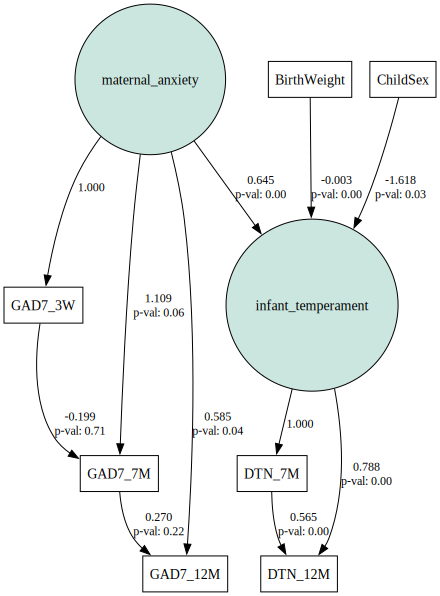

In [83]:
# Visualization of SEM model
semopy.semplot(mod_refined, "SEM_model_cascading.eps", plot_covs=True)

In [84]:
semopy.report(mod_refined, "Cascading Model")

## 6.3-Time-Dependent Influences and Complex Interactions
[Back to Table of Content](#table-of-content)

A secondary aim was to understand the dynamic interactions between maternal mental health and infant temperament over time, considering the repeated measures of maternal anxiety, maternal depression, and DTN scores across multiple time points. Given the complexity of these temporal associations, where maternal anxiety at one time point likely influences anxiety at subsequent points, and where infant temperament at 7 months likely predicts temperament at 12 months, we needed a robust analytical framework to model these interdependencies. The goal was to capture how these time-varying factors interact and influence each other, accounting for the inherent autocorrelation between successive time points.

In [92]:
# Define path analysis model for cascading effects without latent variables
model_desc_path_analysis = """
    # Within-domain cascading effects (autoregressive paths)
    GAD7_7M ~ GAD7_3W
    GAD7_12M ~ GAD7_7M
    EPDS_7W ~ EPDS_3W
    ADS_12M ~ EPDS_7W
    DTN_12M ~ DTN_7M

    # Cross-domain cascading effects (mother-to-child and child-to-mother)
    DTN_7M ~ GAD7_3W + EPDS_3W
    DTN_12M ~ GAD7_7M + EPDS_7W
    GAD7_7M ~ DTN_7M
    GAD7_12M ~ DTN_12M
    EPDS_7W ~ DTN_7M
    ADS_12M ~ DTN_12M

    # Variances and covariances
    GAD7_3W ~~ GAD7_3W
    GAD7_7M ~~ GAD7_7M
    GAD7_12M ~~ GAD7_12M
    EPDS_3W ~~ EPDS_3W
    EPDS_7W ~~ EPDS_7W
    ADS_12M ~~ ADS_12M
    DTN_7M ~~ DTN_7M
    DTN_12M ~~ DTN_12M
"""

# Fit the path analysis model
mod_path_analysis = semopy.Model(model_desc_path_analysis)
res_path_analysis = mod_path_analysis.fit(complete_data_final)

# Get the model summary
mod_path_analysis.inspect()


,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,GAD7_7M,~,GAD7_3W,0.527845,0.053084,9.943530,0.000000e+00
1,GAD7_7M,~,DTN_7M,0.060807,0.031958,1.902737,5.707483e-02
2,EPDS_7W,~,EPDS_3W,-0.713176,0.102426,-6.962841,3.334666e-12
3,EPDS_7W,~,DTN_7M,0.085092,0.041871,2.032243,4.212903e-02
4,DTN_12M,~,DTN_7M,0.813595,0.076859,10.585557,0.000000e+00
5,DTN_12M,~,GAD7_7M,0.433694,0.137923,3.144469,1.663883e-03
6,DTN_12M,~,EPDS_7W,-0.195018,0.112765,-1.729419,8.373408e-02
7,DTN_7M,~,GAD7_3W,0.421982,0.136199,3.098276,1.946502e-03
8,DTN_7M,~,EPDS_3W,-0.114148,0.200577,-0.569099,5.692889e-01
9,GAD7_12M,~,GAD7_7M,0.685536,0.050348,13.615858,0.000000e+00


In [93]:
# Extract fit indices using calc_stats
stats_mod_path_analysis = semopy.calc_stats(mod_path_analysis)
print(stats_mod_path_analysis.T)

                    Value
DoF             15.000000
DoF Baseline    28.000000
chi2           196.178955
chi2 p-value     0.000000
chi2 Baseline  708.998061
CFI              0.733951
GFI              0.723301
AGFI             0.483495
NFI              0.723301
TLI              0.503375
RMSEA            0.243927
AIC             40.076677
BIC            109.757197
LogLik           0.961662


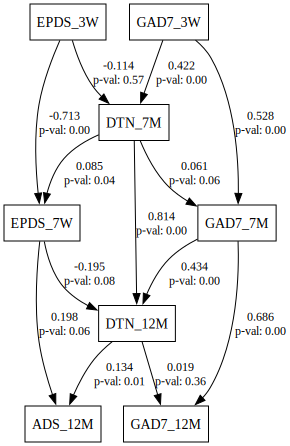

In [94]:
# Visualization of SEM model
semopy.semplot(mod_path_analysis, "Model_pathanalysis.eps", plot_covs=True)

In [95]:
semopy.report(mod_path_analysis, "Path Analysis Model")

## 7-General Conclusion
[Back to Table of Content](#table-of-content)

This analysis highlights the cascading impact of maternal postnatal mental health on infant temperament, revealing specific pathways through which maternal well-being influences temperament traits in early childhood. The findings underscore the value of early intervention strategies to support maternal and child mental health during this formative period. Future research could expand on these findings by exploring additional moderating factors and examining longitudinal effects.